## Logistic Regression
### Titatinc Dataset

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Data

In [81]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [82]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Data

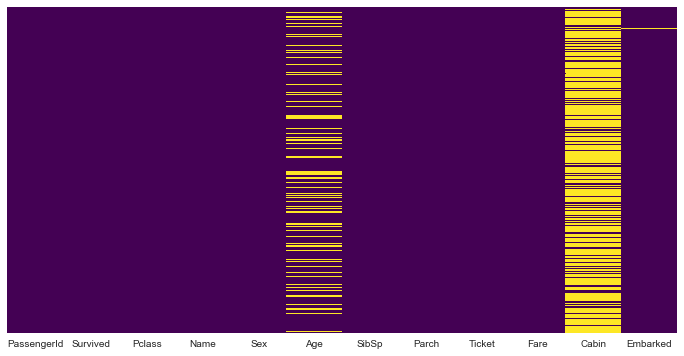

In [83]:
# Heatmap on missing values
plt.figure(figsize=[12,6])
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

# Cabin data missing to much data to be imputed
# Age shows an amount of missing data that can allow imputation

### EDA

In [84]:
sns.set_style('whitegrid')

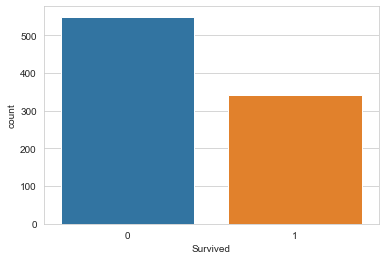

In [85]:
# Count on target clumn
sns.countplot(x='Survived', data=train)

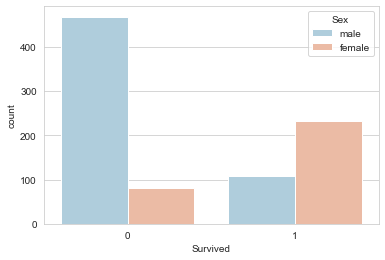

In [86]:
# Count on target clumn by gender
sns.countplot(x='Survived', data=train, hue='Sex', palette = 'RdBu_r')

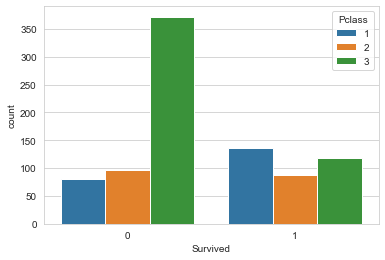

In [87]:
# Count on target clumn by passenger class
sns.countplot(x='Survived', data=train, hue='Pclass')

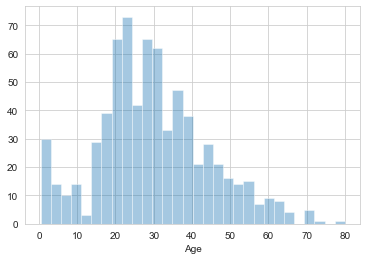

In [88]:
# Age distribution
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

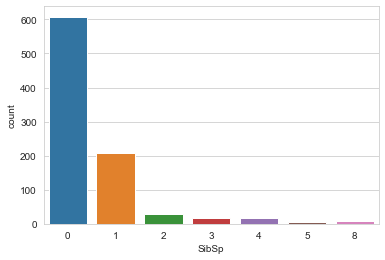

In [89]:
# Sibblings / Spouses
sns.countplot(x=train['SibSp'])

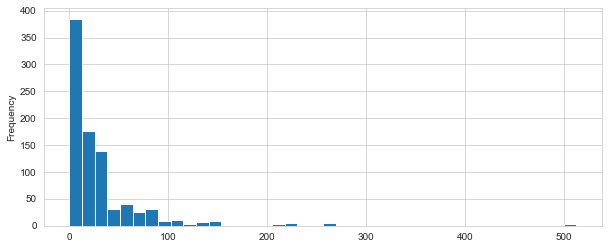

In [90]:
# Fare distribution
train['Fare'].plot.hist(bins=40, figsize=[10,4])

### Data Cleaning  
**Handling missing values**

In [91]:
# Age - imput age based on the PClass average
AgebyClass = train.groupby('Pclass').mean()['Age']
#AgebyClass[AgebyClass.index==1][1]
AgebyClass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [92]:
def imput_age(cols):
    AgebyClass = train.groupby('Pclass').mean()['Age']
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
    else:
        return Age

In [93]:
train['Age'] = train[['Age','Pclass']].apply(imput_age, axis=1)

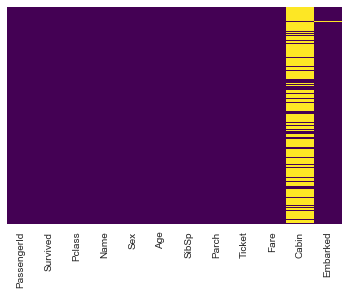

In [94]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [95]:
# Drop cabin column - too many missing values
train.drop('Cabin', axis=1, inplace=True)

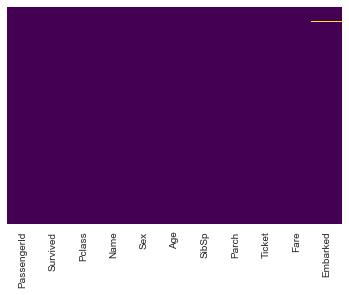

In [96]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [97]:
# Drop rows still with missing values
train.dropna(inplace=True)

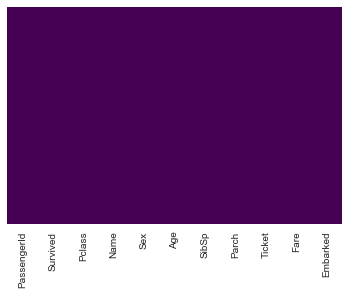

In [98]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Dealing with categorical variables**

In [99]:
# Convert caegorical values to dummies
pd.get_dummies(train['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [100]:
# Since there are only 2 possible values, one column is enough, so you can drop the first one
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [102]:
# For the Embarked category there were 3 possible values
pd.get_dummies(train['Embarked']).head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
96,1,0,0
97,1,0,0
98,0,0,1
99,0,0,1


In [104]:
# So dropping the first columns makes the remaining two not perfect predictors of each other
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head(100)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
96,0,0
97,0,0
98,0,1
99,0,1


In [105]:
# Concatenate converted columns
train = pd.concat([train, sex, embark], axis=1)

In [108]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


**Drop text/categorical columns**

In [109]:
train.drop(['Name','Sex','Ticket','Embarked', 'PassengerId'], axis=1, inplace=True)

In [110]:
train.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
5,0,3,25.0,0,0,8.4583,1,1,0
6,0,1,54.0,0,0,51.8625,1,0,1
7,0,3,2.0,3,1,21.0750,1,0,1
8,1,3,27.0,0,2,11.1333,0,0,1
9,1,2,14.0,1,0,30.0708,0,0,0


In [111]:
train.tail()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
886,0,2,27.0,0,0,13.00,1,0,1
887,1,1,19.0,0,0,30.00,0,0,1
888,0,3,25.0,1,2,23.45,0,0,1
889,1,1,26.0,0,0,30.00,1,0,0
890,0,3,32.0,0,0,7.75,1,1,0


### Train Data

In [112]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [113]:
# from sklearn.model_selection import train_test_split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [115]:
# from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [116]:
# Fit
logmodel.fit(X_train,y_train)

/Users/ritaviegas/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
X_train

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
807,3,18.0,0,0,7.7750,0,0,1
651,2,18.0,0,1,23.0000,0,0,1
2,3,26.0,0,0,7.9250,0,0,1
690,1,31.0,1,0,57.0000,1,0,1
196,3,25.0,0,0,7.7500,1,1,0
...,...,...,...,...,...,...,...,...
576,2,34.0,0,0,13.0000,0,0,1
840,3,20.0,0,0,7.9250,1,0,1
338,3,45.0,0,0,8.0500,1,0,1
524,3,25.0,0,0,7.2292,1,0,0


### Predict data

In [119]:
predictions = logmodel.predict(X_test)

### Evaluation

In [120]:
# from sklearn.metrics import classification_report

In [121]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       163
           1       0.85      0.69      0.76       104

    accuracy                           0.83       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [124]:
# Confusion Matrix
# from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[150,  13],
       [ 32,  72]])